# The Simple Recommender

# Data

https://www.kaggle.com/rounakbanik/the-movies-dataset

# Setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
plt.style.use("ggplot")

# Read data

In [3]:
df = pd.read_csv('data/movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.shape

(45466, 24)

# Shrinkage estimate of score

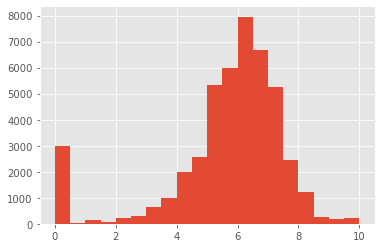

In [9]:
_ = plt.hist(df["vote_average"], bins=20)

In [10]:
m = df['vote_count'].quantile(0.80)
m

50.0

In [11]:
weight = df['vote_count'] / (df['vote_count'] + m)

In [13]:
df['score'] = weight * df["vote_average"] + (1 - weight) * df["vote_average"].mean()

In [14]:
df[['title', 'vote_count', 'vote_average', 'score', 'runtime']].sort_values('score', ascending=False).head(25)

,title,vote_count,vote_average,score,runtime
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.855148,190.0
314,The Shawshank Redemption,8358.0,8.5,8.482863,142.0
834,The Godfather,6024.0,8.5,8.476278,175.0
40251,Your Name.,1030.0,8.5,8.366584,106.0
12481,The Dark Knight,12269.0,8.3,8.289115,152.0
2843,Fight Club,9678.0,8.3,8.286216,139.0
292,Pulp Fiction,8670.0,8.3,8.284623,154.0
522,Schindler's List,4436.0,8.3,8.270109,195.0
23673,Whiplash,4376.0,8.3,8.269704,105.0
5481,Spirited Away,3968.0,8.3,8.266628,125.0
